#### Libraries Used:
In this project, we use several essential libraries to build our web scraper and deploy it with Flask:

__1. Flask:__ A micro web framework used to build the web application and manage API routes. __render_template__ helps in rendering dynamic web pages, while __request__ and __jsonify__ handle incoming requests and send __JSON__ responses.

__2. flask_cors:__ A library to manage Cross-Origin Resource Sharing (CORS), enabling requests from different domains to interact with our Flask app.

__3. requests:__ Used to send HTTP requests to fetch the HTML content of the target website for scraping.

__4. BeautifulSoup:__ A powerful library used for parsing and navigating through the HTML structure of web pages to extract the desired data.

__5. urllib.request:__ A standard Python library used for opening and reading URLs, an alternative to requests for fetching web content.

In [1]:
# Import all required libraries
from flask import Flask, render_template, request, jsonify
from flask_cors import CORS, cross_origin
import requests
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen as uReq

In [2]:
# Search text: this is the item you want to search for on the website
search_string = "iphone11"

In [3]:
# Construct the main URL of the Daraz website with the search string appended to it
daraz_url = "https://www.daraz.lk/catalog/?q=" + search_string

In [4]:
# Display the full URL being used (optional step for debugging)
daraz_url

'https://www.daraz.lk/catalog/?q=iphone11'

In [5]:
# Open the connection to the URL using urllib's uReq (urlopen)
uclient = uReq(daraz_url)

In [6]:
uclient

In [7]:
# Read the entire HTML content of the page (including HTML, CSS, JavaScript, etc.)
daraz_page = uclient.read()

In [8]:
# Close the connection to the URL once we've fetched the data
uclient.close()

In [9]:
# Parse the raw HTML content with BeautifulSoup using the "html.parser" (an inbuilt parser)
# This will convert the raw HTML into a BeautifulSoup object that we can work with
daraz_html = bs(daraz_page, "html.parser")


<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="a2a0e" name="data-spm"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width" name="viewport"/>
<meta content="origin" name="referrer"/>
<meta content="assetPerf,imagesPerf" name="lzd-itrace-close-auto-monitor"/>
<meta content="sg.mmstat.com" name="aplus-rhost-v"/>
<meta content="sg.mmstat.com" name="aplus-rhost-g"/>
<meta content='{"daraz_web_version":"2.0.0"}' name="aplus-cpvdata"/>
<meta content='{"daraz_web_version":"2.0.0"}' name="aplus-exdata"/>
<link href="//cart.daraz.lk" rel="preconnect dns-prefetch"/>
<link href="//member.daraz.lk" rel="preconnect dns-prefetch"/>
<link href="//acs-m.daraz.lk" rel="preconnect dns-prefetch"/>
<link href="//laz-img-cdn.alicdn.com" rel="preconnect dns-prefetch"/>
<link href="//g.alicdn.com" rel="preconnect dns-prefetch"/>
<link href="//g.lazcdn.com" rel="preconnect dns-prefetch"/>
<link href="//o.alicdn.com" rel="preconnect dns-pr
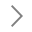

In [10]:
# Print the parsed HTML (optional step for checking how the data looks after parsing)
daraz_html

In [16]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from time import sleep

# Set up Chrome options (optional)
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run Chrome in headless mode (no UI)

# Start the browser
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# URL to scrape
url = "https://www.daraz.lk/catalog/?q=iphone11"  # Replace with the actual URL you want to scrape
driver.get(url)

# Wait for the page to load
sleep(5)

# Find all divs with the class 'Bm3ON'
all_divs_bm3on = driver.find_elements(By.CSS_SELECTOR, "div.Bm3ON")

# Print the number of divs found and the first few divs
print(f"Number of divs with class 'Bm3ON' found: {len(all_divs_bm3on)}")
for div in all_divs_bm3on[:5]:  # Print the first 5 divs
    print(div.text)

# Close the browser
driver.quit()


Number of divs with class 'Bm3ON' found: 40
Genuine iphone 11 pro 256GB with Warranty
Rs. 139,900
20 sold
(9)
North Central
Orginal Iphone 11 128GB With Warranty
Rs. 114,900
Gems save Rs. 1,149
5 sold
(1)
North Central
Genuine iphone 11 - 128GB with One year Warranty
Rs. 114,900
Gems save Rs. 1,149
6 sold
(4)
North Central
Apple iPhone 14 - One Year Software and Hardware Apple Care Warranty
Rs. 195,500
16 sold
(5)
North Western
Iphone 12 pro (256GB) with warranty
Rs. 159,999
6 sold
(2)
Western
